# ------------------------ STOCK PRICE PREDICTION ANALYSIS ------------------------

# IMPORTING LIBRARIES

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
from tabulate import tabulate

# FETCHING STOCK DATA

In [ ]:
def fetch_stock_data(ticker, period="2mo", interval="1d"):
    stock_data = yf.Ticker(ticker)
    df = stock_data.history(period=period, interval=interval)
    return df


# PREPARING DATA

In [ ]:
def prepare_data(df):
    df = df.copy()

    df['Average'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

    df['SMA_5'] = df['Close'].rolling(window=5).mean()

    df['Return'] = df['Close'].pct_change()
    df['Z_Score'] = zscore(df['Return'], nan_policy='omit')

    df_clean = df[(df['Z_Score'].abs() < 3)].copy()

    df_clean['Price_Up'] = np.where(df_clean['Close'].shift(-1) > df_clean['Close'], 1, 0)
    df_clean.dropna(inplace=True)

    feature_cols = ['Average', 'SMA_5', 'Volume']

    X_raw = df_clean[feature_cols]
    y_reg = df_clean['Close']
    y_class = df_clean['Price_Up']

    scaler = StandardScaler()
    X_scaled_array = scaler.fit_transform(X_raw)

    X = pd.DataFrame(X_scaled_array, columns=feature_cols, index=X_raw.index)

    return X, y_reg, y_class

# REGRESSION AND CLASSIFICATION MODELS

In [ ]:
def train_regression_model(X, y, split_idx):
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_test, y_test

def train_svr_model(X, y, split_idx):
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    model.fit(X_train, y_train)
    return model, X_test, y_test

def train_classification_model(X, y, split_idx):
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# PLOTTING THE STOCK TRENDS CHART

In [ ]:
# def plot_stock_prices(df, company_name):
#     plt.plot(df['Close'], label=f'{company_name} Stock Prices', color='blue', linewidth=3)

def plot_stock_prices(df, company_name, test_dates=None, lr_pred=None, svr_pred=None):
    plt.figure(figsize=(12, 6))

    plt.plot(df.index, df['Close'], label='Actual Price', color='gray', alpha=0.5)

    if test_dates is not None and lr_pred is not None and svr_pred is not None:
        limit = min(len(test_dates), len(lr_pred), len(svr_pred))

        plt.plot(test_dates[-limit:], lr_pred[-limit:], label='Linear Regression', linestyle='--', color='blue', linewidth=2)
        plt.plot(test_dates[-limit:], svr_pred[-limit:], label='SVR Prediction', linestyle='--', color='orange', linewidth=2)
        plt.title(f'{company_name} - Model Comparison (Test Period)', fontsize=16)
    else:
        plt.title(f'{company_name} PRICE TREND', fontsize=16)

    plt.xlabel('DATE', fontsize=15)
    plt.ylabel('PRICES IN USD', fontsize=15)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# EVALUATING MODEL PERFORMANCES

In [ ]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"[{name}] MSE: {mse:.4f} | R2: {r2:.4f}")
    return mse, r2

# INVESTMENT RECOMMENDATION




----------------------------------------- STOCK PRICE PREDICTION -------------------------------------------------------



ENTER COMPANY NAME (ticker name): wmt

Fetched 502 days of data for WMT.

--- PHASE 1: MODEL ACCURACY CHECK (On Past Data) ---
[Linear Regression] MSE: 0.2654 | R2: 0.9854
[Support Vector Reg] MSE: 1.1080 | R2: 0.9390


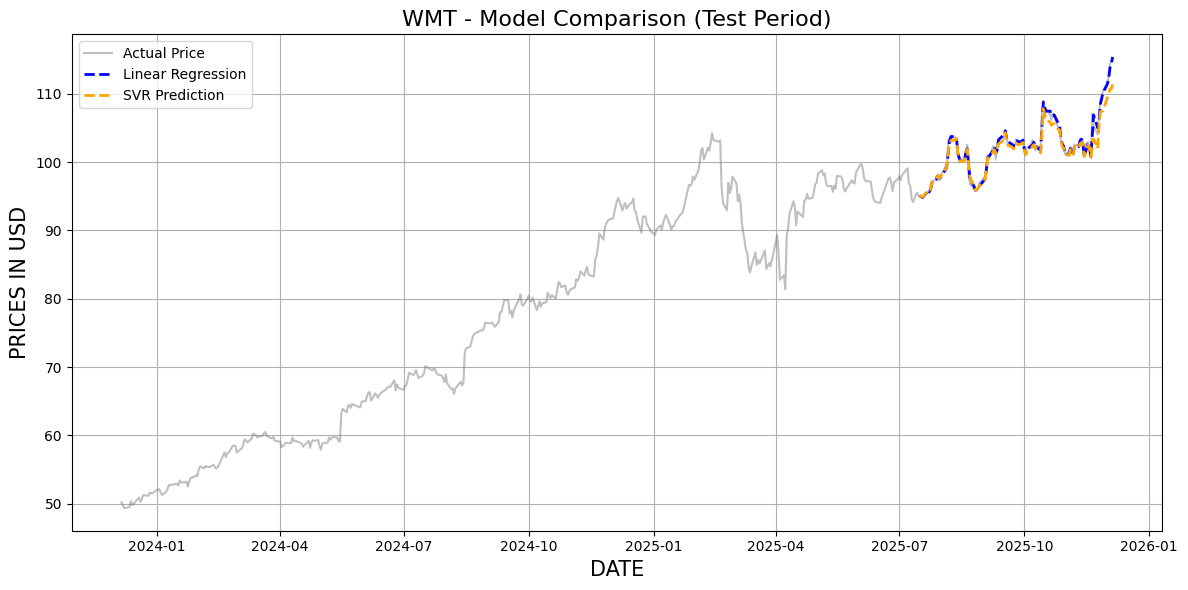


--- PHASE 2: FORECASTING TOMORROW ---
Date Used for Prediction: 2025-12-05
╒══════════════════════════╤═════════╕
│ Metric                   │ Value   │
╞══════════════════════════╪═════════╡
│ Last Actual Close        │ $115.11 │
├──────────────────────────┼─────────┤
│ Linear Regression Target │ $115.41 │
├──────────────────────────┼─────────┤
│ SVR Target               │ $115.21 │
├──────────────────────────┼─────────┤
│ Direction Recommendation │ WAIT    │
╘══════════════════════════╧═════════╛


In [ ]:
def main():
    print("\n\n\n----------------------------------------- STOCK PRICE PREDICTION -------------------------------------------------------")
    company = input("\n\n\nENTER COMPANY NAME (ticker name): ").strip().upper()

    try:
        # df = fetch_stock_data(company)

        # print("\nDISPLAYING DATA FOR THE COMPANY:")
        # print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

        # X, y_reg, y_class = prepare_data(df)

        # reg_model, X_test_reg, y_test_reg = train_regression_model(X, y_reg)
        # class_model, X_test_class, y_test_class = train_classification_model(X, y_class)

        # reg_prediction = reg_model.predict(X_test_reg.iloc[:1])
        # class_prediction = class_model.predict(X_test_class.iloc[:1])

        # print(f"\n\n\nPREDICTED PRICES FOR TOMORROW: ${reg_prediction[0]:.2f}")
        # print(f"\nINVESTMENT RECOMMENDATION: {'Invest' if class_prediction[0] == 1 else 'Do Not Invest'}")

        # print("\n\n\nStock Price Trend: ")
        # plot_stock_prices(df, company)

        # print("\n\n\n\nEVALUATION METRICS:\n")
        # evaluate_models(company)

        df = fetch_stock_data(company, period="2y")
        if df.empty:
            print("No data found.")
            return

        print(f"\nFetched {len(df)} days of data for {company}.")

        X, y_reg, y_class = prepare_data(df)

        print("\n--- PHASE 1: MODEL ACCURACY CHECK (On Past Data) ---")
        split_point = int(len(X) * 0.8)

        lr_model, X_test, y_test = train_regression_model(X, y_reg, split_point)
        lr_pred = lr_model.predict(X_test)
        evaluate_model("Linear Regression", y_test, lr_pred)

        svr_model, _, _ = train_svr_model(X, y_reg, split_point)
        svr_pred = svr_model.predict(X_test)
        evaluate_model("Support Vector Reg", y_test, svr_pred)

        plot_stock_prices(df, company, X_test.index, lr_pred, svr_pred)

        print("\n--- PHASE 2: FORECASTING TOMORROW ---")

        full_lr = LinearRegression()
        full_lr.fit(X, y_reg)

        full_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        full_svr.fit(X, y_reg)

        full_class = RandomForestClassifier(n_estimators=100, random_state=42)
        full_class.fit(X, y_class)

        latest_data = X.iloc[[-1]]
        current_date = latest_data.index[0].date()

        last_actual_close = df.loc[latest_data.index[0]]['Close']

        lr_price = full_lr.predict(latest_data)[0]
        svr_price = full_svr.predict(latest_data)[0]
        signal = full_class.predict(latest_data)[0]

        results = [
            ["Last Actual Close", f"${last_actual_close:.2f}"],
            ["Linear Regression Target", f"${lr_price:.2f}"],
            ["SVR Target", f"${svr_price:.2f}"],
            ["Direction Recommendation", "INVEST" if signal == 1 else "WAIT"]
        ]

        print(f"Date Used for Prediction: {current_date}")
        print(tabulate(results, headers=["Metric", "Value"], tablefmt="fancy_grid"))

    except ValueError as ve:
        print(f"Value Error: {ve}")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
